https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

We are going to start by importing one the required libraries for this task: NumPy

We are going to import pathlib, matplotlib, SeaBorn, tensorflow and keras.

matplotlib and Seaborn are used for visualization


pathlib provides a readable and easier way to build paths.

Finally we will have pandas is one of the best data preprocessing libraries

In [1]:
#Importing important libraries

import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
#from __future__ import absolute_import, division, print_function 
print(tf.__version__)

2.5.0


In [2]:
# Datapath to import auto-mpg data
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

32768/30286 [================================] - 0s 2us/step


In [3]:
# Coloumn names for dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 

In [4]:
#Importing dataset
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [5]:
# Checking the dataset

raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
#Creating a copy of dataset
dataset = raw_dataset.copy()

In [7]:
# Is there any NA value in data frame? 

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
# We had 6 NA values in our data and we are dropping NA values
dataset = dataset.dropna()

In [9]:
# 'Origin' column is a categorical so creating one hot encoding
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


**SPLITTING THE DATA**

It's time to split the data into train/test sets. Bear in mind that sometimes, people like to split their  data three was: train, test, validation. 

For now, we will keep things simple and just use train and test


First we will split the data into train_data and test_data. We are going to use train_data for training and test_data for prediction. We are going to have 80-20 split

In [10]:
#Creating train and test samples of 80/20 ration
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

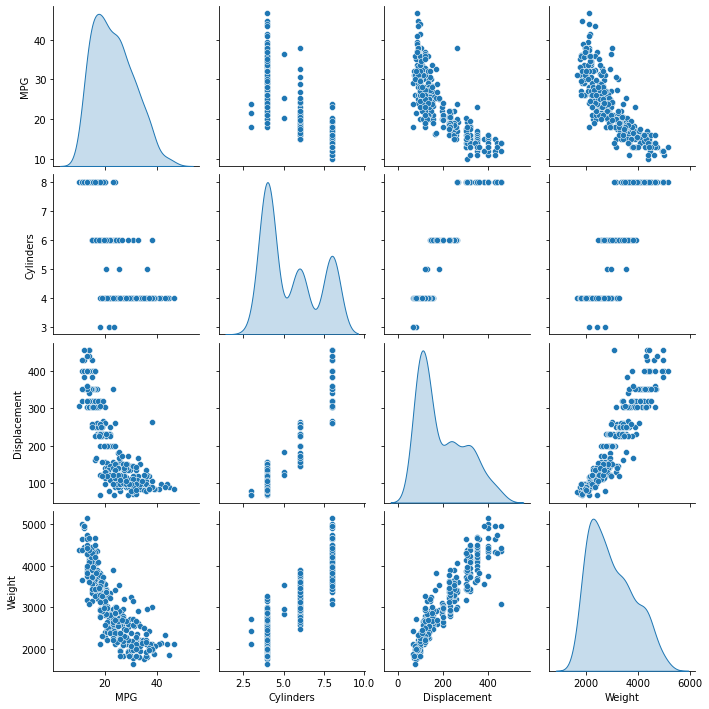

In [11]:
#Multivariate analysis 
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [12]:
train_stats = train_dataset.describe()

In [13]:
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [14]:
train_stats.pop("MPG")

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [15]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [16]:
#Creating train and test labels
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [17]:
#checking test dataset
train_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0


In [18]:
#Checking test dataset
test_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0


In [19]:
#Checking train_labels
train_labels.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: MPG, dtype: float64

In [20]:
#Checking test labels
test_labels.head()

9     15.0
25    10.0
28     9.0
31    25.0
33    19.0
Name: MPG, dtype: float64

Standardizing the data

Usually when we use neural networks we get improved performnace when we standardize the data.

Standardization just means normalizing the values so that they all fit between a certain range such as 0 to 1 or -1 to +1

The method which we will normalize data is by using the mean and standard deviations

In [21]:
#Method to normalized data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [22]:
#Normalizing train and test data
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Building and compiling our model

Now we can build our model. First we are going to use Sequential() with two hidden layers and output a single continuous value. We have a wrapper function called model_building for this.

When we compile the model, we need to choose a loss function, an optimizer and accuracy metrics.

We used RMSprop as the optimizer, mean_square_error as the loss function, and mean_absolute_error and mean_square_error as the required metrics.

Mean Squared Error (MSE) is a common loss function used for regression problems.

Evaluation metrics for regression is a Mean Absolute Error (MAE)



In [23]:
# Method to build model 
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
 
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [24]:
#Creating instance of a model
model = build_model()

In [25]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


**TRAIN THE MODEL**

In [26]:
#Creating examples
example_batch = normed_train_data[:10]

In [27]:
#Predicting on example batch
example_result = model.predict(example_batch)
example_result

array([[ 0.0956687 ],
       [-0.00805257],
       [-0.21119703],
       [ 0.06295305],
       [ 0.02414721],
       [-0.28488892],
       [ 0.05411518],
       [ 0.384013  ],
       [-0.08573964],
       [ 0.32204425]], dtype=float32)

In [28]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [29]:
#Number of epochs
EPOCHS = 1000

In [30]:
#Training model
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

We will visualize the model's training progress

In [31]:
# Lets check loss, mean absolute error, mean square error, val loss, val mean squared error and val mean absolute error
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.320894,0.932362,2.320894,8.439054,2.223921,8.439054,995
996,2.494917,0.984110,2.494917,9.269434,2.346648,9.269434,996
997,2.337842,0.961946,2.337842,8.687930,2.257214,8.687930,997
998,2.524041,1.009615,2.524041,8.522377,2.231743,8.522377,998
999,2.523581,1.029930,2.523581,8.854494,2.297122,8.854494,999


In [32]:
# Method to Plot loss

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

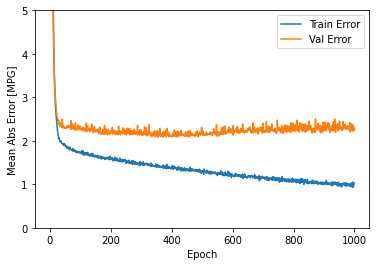

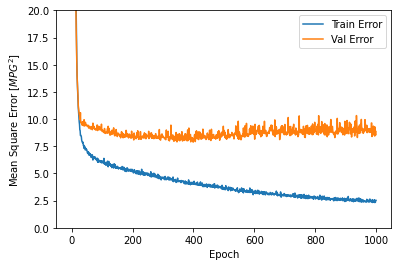

In [33]:
# Plot train and validation loss
plot_history(history)

As we can see, there has been an improvement as well as degradation in terms of validation loss. There is a way by which we can automatically stop the training process when the validation score is not improving : **callbacks**.


This is a set of functions that can be applied at given stages of the training procedure. Here we will use callbacks as an early stopping mechanism. This will help us avoid overfitting by terminating training early.

In [37]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])





................................................

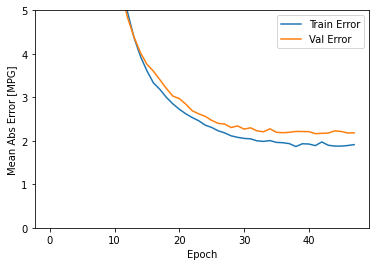

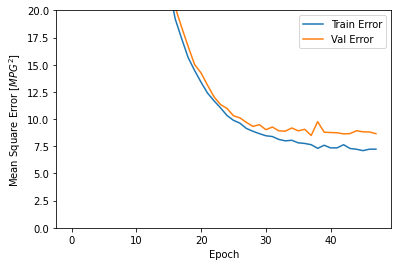

In [38]:
plot_history(history)

In [39]:
# Let's check out the result
loss, mae,mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing dataset Mean Abs Error (MAE): {:5.2f} MPG".format(mae))

Testing dataset Mean Abs Error (MAE):  1.96 MPG


Here we can see that the value of MAE is 1.96 which is not bad

With that we have trained the model. In the next video we will make some predictions using unseen data.

**Predicting new, unseen data**

Now, let's see how we did by making predictions on the test data. 

Remember our model has never seen the test data that we scaled previously. This process is the same process that you would use on brand-new-data

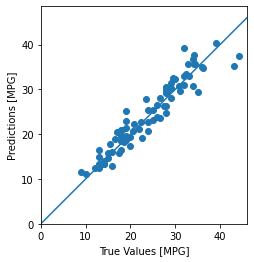

In [40]:
# Performing prediction 
test_predictions = model.predict(normed_test_data).flatten()
 
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

As you can see our prediction is very close to our actual data. So that means our model perfroms very well.


In the next video we will evaluate the model to prove that.

**Evaluate the model's performance**

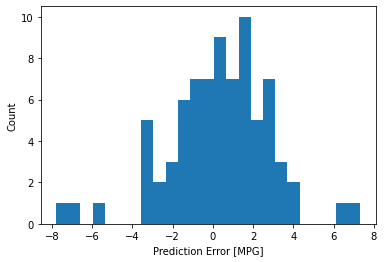

In [41]:
# Checking the loss
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")
plt.show()

It looks like the mode predicted reasonably well. The distribution error of the model shows it is not quite Gaussian or normally distributed, but we can expect non-Gaussian as the number of samples is very small.